<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b>Two Qubits</b></font>
<br>
<br><br>
[<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/qvQrDjRRj28)
<br><br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [4]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1sVqhdYqlz9oXwAeaLAr1Ey0aq8g_ruQ1?usp=sharing#scrollTo=iz2701zNJ7NO' if in_colab() else 'QB25_Q60_Two_Qubits_Solutions.ipynb#task3')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1sVqhdYqlz9oXwAeaLAr1Ey0aq8g_ruQ1?usp=sharing#scrollTo=Z5nTlGTwJ7NQ' if in_colab() else 'QB25_Q60_Two_Qubits_Solutions.ipynb#task5')))
SolutionToTask6 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1sVqhdYqlz9oXwAeaLAr1Ey0aq8g_ruQ1?usp=sharing#scrollTo=TgftF2ZrJ7NQ' if in_colab() else 'QB25_Q60_Two_Qubits_Solutions.ipynb#task6')))
SolutionToTask7 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1sVqhdYqlz9oXwAeaLAr1Ey0aq8g_ruQ1?usp=sharing#scrollTo=btRVhF1HJ7NQ' if in_colab() else 'QB25_Q60_Two_Qubits_Solutions.ipynb#task7')))

if in_colab():
    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

##### Remember that when we have a quantum system with two qubits, then we can represent its states as $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $.

The state $ \ket{ab} $ means that

- the first qubit is in state $ \ket{a} $ and
- the second qubit is in state $ \ket{b} $,

where $ a,b \in \{0,1\} $.

$ \ket{ab} = \ket{a} \otimes \ket{b} $ (or shortly $\ket{a}\ket{b}$.

<h3> Task 1 (vector representation)</h3>

Verify the vector representations of $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $:

$$
    \ket{00} = \myvector{1 \\ 0 \\ 0 \\ 0},
    ~~~~~~
    \ket{01} = \myvector{0 \\ 1 \\ 0 \\ 0},
    ~~~~~~
    \ket{10} = \myvector{0 \\ 0 \\ 1 \\ 0},
    ~~~ \mbox{ and }  ~~~
    \ket{11} = \myvector{0 \\ 0 \\ 0 \\ 1}.
$$

<h3> Task 2 (generalization)</h3>

Suppose that we have $ k>1 $ qubits (or bits).

Then, any deterministic (basis) state can be represented by $ k $ bits:  $ \ket{b_1b_2\cdots b_k} $, where any $ b_j \in \{0,1\} $ for $ 1 \leq j \leq k $.

- What is the size of the vector representing the states of $k$ qubits?
- If the decimal value of $ \ket{b_1 b_2 \cdots b_k} $ is $ b $, then which entry has the value of 1?

<h3>Operators on two qubits</h3>

We define a quantum circuit with two qubits and apply the Hadamard operator to each of them.

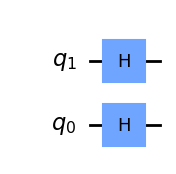

In [5]:
from qiskit import QuantumCircuit

# remark the concise representation of a quantum circuit
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.draw(output='mpl',reverse_bits=True)

These two Hadamards can also be represented as a single quantum operator on two qubits: $ H \otimes H $.

$$
   H^{\otimes 2} = H \otimes H = \hadamard \otimes \hadamard = \Htwo .
$$

<h3> Unitary backend</h3>

Unitary_simulator gives a single matrix representation of all gates in the circuit until that point.

    job = execute(circuit, Aer.get_backend('unitary_simulator'),optimization_level=0)
    current_unitary = job.result().get_unitary(circuit, decimals=3).data
    print(current_unitary)

In [7]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

0.5 0.5 0.5 0.5 
0.5 -0.5 0.5 -0.5 
0.5 0.5 -0.5 -0.5 
0.5 -0.5 -0.5 0.5 


<h3> Task 3 </h3>

We define a quantum circuit with two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

We apply the Hadamard operator to $q_1$.

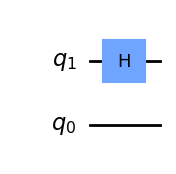

In [13]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.draw(output='mpl',reverse_bits=True)

Then, the quantum operator applied to both qubits will be $ H \otimes I $.

Read the quantum operator of the above circuit by using 'unitary_simulator' and then verify that it is $ H \otimes I $.

In [14]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real,3)) + " "
    print(column)

0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


To check out our solution, run the next cell:

In [10]:
SolutionToTask3()  # show solution for task 3

<IPython.core.display.Javascript object>

<h3>Applying Hadamards to both qubits</h3>

Applying a h-gate to the first and second qubits is the same as applying the following single operator on both qubits:

$$
   H^{\otimes 2} = H \otimes H = \hadamard \otimes \hadamard = \Htwo .
$$

<h4> Case 1: Let's find $ H^{\otimes 2} \ket{00} $ (in three different ways) </h4>

- Direct matrix-vector multiplication:
$$H^{\otimes 2} \ket{00} = \Htwo \myvector{1 \\ 0 \\ 0 \\ 0} = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2}}$$
- We calculate the quantum state of each state, and then we find the quantum state of the composite system.
$$
    H\ket{0} \otimes H \ket{0}
    = \stateplus \otimes \stateplus
    = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} }.
$$
- We make calculations with $ \ket{0} $ and $ \ket{1} $.
$$
    H \ket{0} \otimes H \ket{0}
    = \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
        \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
    = \frac{1}{2} \ket{00} + \frac{1}{2} \ket{01} + \frac{1}{2} \ket{10} + \frac{1}{2} \ket{11}
    = \myvector{ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} }.
$$


<hr>
<h3> Task 4 </h3>

Pick one of the following cases (2, 3, or 4), and verify the correctness of all three different ways for this selected case.
<hr>

<h4> Case 2: Let's find $ H^{\otimes 2} \ket{01} $ (in three different ways) </h4>
<ul>
    <li> Direct matrix-vector multiplication:
        $$
            H^{\otimes 2} \ket{01}
            = \Htwo \myvector{0 \\ 1 \\ 0 \\ 0}
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} } .
        $$ </li>
    <li> We calculate the quantum state of each state, and then we find the quantum state of the composite system.
        $$
            H\ket{0} \otimes H \ket{1}
            = \stateplus \otimes \stateminus
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} }.
        $$ </li>
    <li> We make calculations with $ \ket{0} $ and $ \ket{1} $.
        $$
            H \ket{0} \otimes H \ket{1}
            = \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
                \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
            = \frac{1}{2} \ket{00} - \frac{1}{2} \ket{01} + \frac{1}{2} \ket{10} - \frac{1}{2} \ket{11}
            = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} }.
        $$
</ul>

<h4> Case 3: Let's find $ H^{\otimes 2} \ket{10} $ (in three different ways) </h4>

- Direct matrix-vector multiplication:
$$
    H^{\otimes 2} \ket{10}
    = \Htwo \myvector{0 \\ 0 \\ 1 \\ 0}
    = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} } .
$$
- We calculate the quantum state of each state, and then we find the quantum state of the composite system.
$$
    H\ket{1} \otimes H \ket{0}
    = \stateminus \otimes \stateplus
    = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} }.
$$
- We make calculations with $ \ket{0} $ and $ \ket{1} $.
$$
    H \ket{1} \otimes H \ket{0}
    = \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
        \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
    = \frac{1}{2} \ket{00} + \frac{1}{2} \ket{01} - \frac{1}{2} \ket{10} - \frac{1}{2} \ket{11}
    = \myrvector{ \frac{1}{2} \\ \frac{1}{2} \\ - \frac{1}{2} \\ -\frac{1}{2} }.
$$


<h4> Case 4: Let's find $ H^{\otimes 2} \ket{11} $ (in three different ways) </h4>

- Direct matrix-vector multiplication:
$$
    H^{\otimes 2} \ket{11}
    = \Htwo \myvector{0 \\ 0 \\ 0 \\ 1}
    = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} } .
$$
- We calculate the quantum state of each state,and then we find the quantum state of the composite system.
$$
    H\ket{1} \otimes H \ket{1}
    = \stateminus \otimes \stateminus
    = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} }.
$$
- We make calculations with $ \ket{0} $ and $ \ket{1} $.
$$
    H \ket{1} \otimes H \ket{1}
    = \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
        \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
    = \frac{1}{2} \ket{00} - \frac{1}{2} \ket{01} - \frac{1}{2} \ket{10} + \frac{1}{2} \ket{11}
    = \myrvector{ \frac{1}{2} \\ - \frac{1}{2} \\ - \frac{1}{2} \\ \frac{1}{2} }.
$$

<hr>

<h3> CNOT operator </h3>

CNOT is an operator defined on two qubits:

$$
    CNOT = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} .
$$

Its effect is very simple: if the state of the first qubit is one, then the state of the second qubit is flipped.

If the state of the first qubit is zero, then the state of the second qubit remains the same.

In summary:

- $ CNOT \ket{00} = \ket{00} $,
- $ CNOT \ket{01} = \ket{01} $,
- $ CNOT \ket{10} = \ket{11} $, and,
- $ CNOT \ket{11} = \ket{10} $.

CNOT refers to as Controlled-NOT: NOT operator is applied in a controlled way.

<h3> cx-gate </h3>

In Qiskit, CNOT operator is represented as cx-gate.

It takes two arguments: controller-qubit and target-qubit.

Its implementation is as follows:

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> that is <b>CONTROLLED</b> by <u>the controller qubit</u>.</i>

We apply CNOT operator to the states $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $ and then measure each.

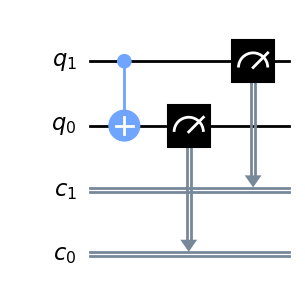

00 --CNOT-> {'00': 1024}


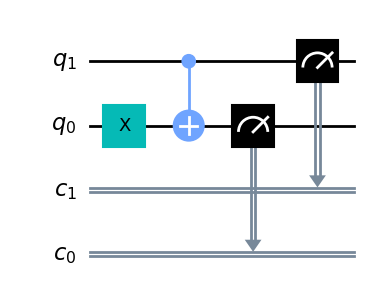

01 --CNOT-> {'01': 1024}


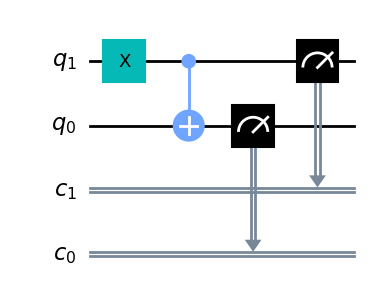

10 --CNOT-> {'11': 1024}


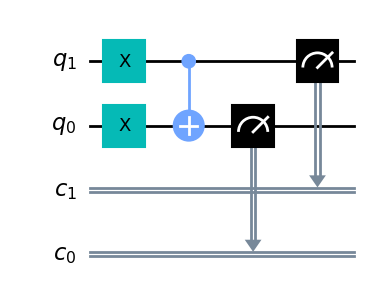

11 --CNOT-> {'10': 1024}


In [9]:
pairs = ['00','01','10','11']

for pair in pairs:
    from qiskit import QuantumCircuit, execute, Aer
    qc = QuantumCircuit(2,2)
    # initialize the pair
    # we follow the reading order in Qiskit
    # q1-tensor-q0
    if pair[1] == '1':
        qc.x(0)
    if pair[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(pair,"--CNOT->",counts)

<h3> Task 5 </h3>

Create a quantum circuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit.

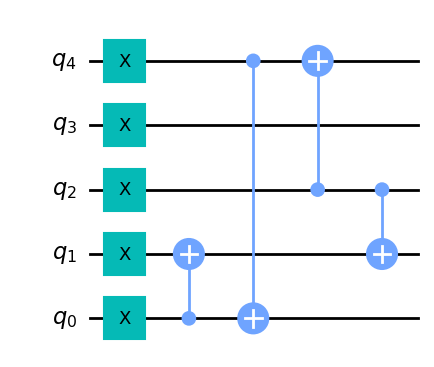

{'01110': 100}


In [34]:
# Import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

# Initialize the quantum circuit
qc = QuantumCircuit(5)

# Apply X gates to all qubits
for i in range(5):
    qc.x(i)

# Apply random CNOT gates with different control and target qubits
for i in range(4):
    a = randrange(5)
    b = randrange(5)
    while b == a:  # Ensure that control and target qubits are different
        b = randrange(5)
    qc.cx(a, b)

# Display the circuit
display(qc.draw(output='mpl', reverse_bits=True))

#Doing the execution
qc.measure_all()
job = execute(qc, Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask5()  # show solution for task 5

<h3>Task 6</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

- Apply Hadamard to the both qubits.
- Apply CNOT($q_1$,$q_0$).
- Apply Hadamard to the both qubits.
- Measure the circuit.

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration.

Observe that the overall circuit implements CNOT($q_0$,$q_1$).

In [36]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#
# your code is here
#
qc = QuantumCircuit(2)

qc.h(range(2))
qc.cx(1,0)
qc.h(range(2))

qc.measure_all()
job = execute(qc, Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

{'00': 100}


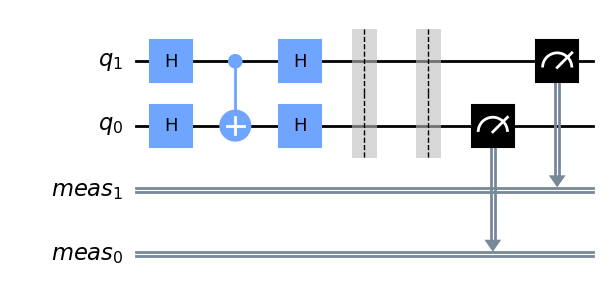

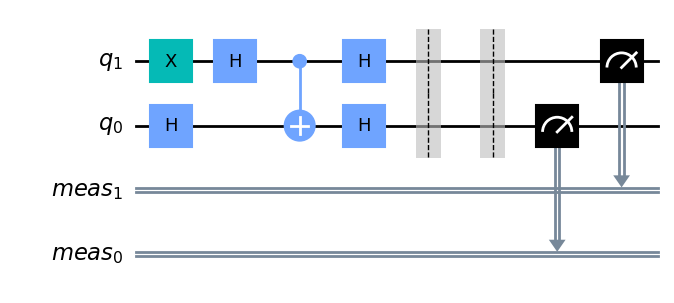

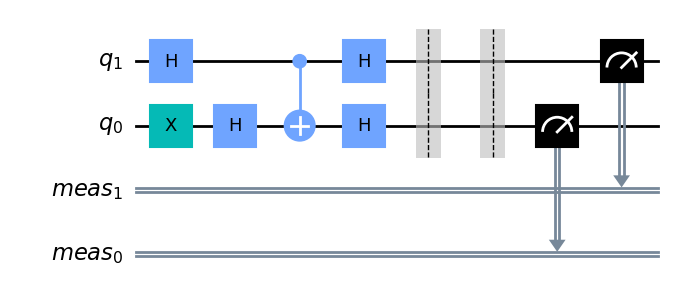

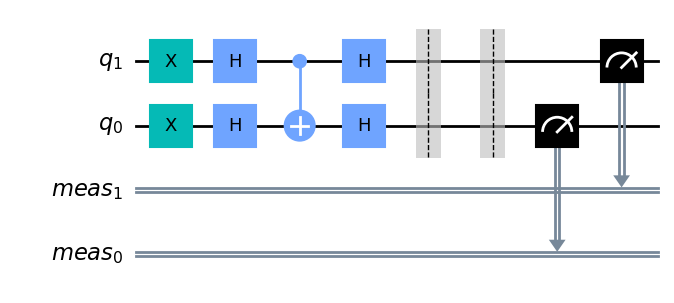

In [42]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

states = ['00', '01', '10', '11']

# Loop over each state in the `states` list
for state in states:
    # Create a new 2-qubit quantum circuit for each state
    qc = QuantumCircuit(2)

    # Set the initial state based on `state`
    if state[1] == '1':
        qc.x(1)
    if state[0] == '1':
        qc.x(0)

    # Apply the rest of the circuit
    qc.h(range(2))
    qc.cx(1, 0)
    qc.h(range(2))

    # Measure both qubits
    qc.barrier()
    qc.measure_all()

    # Draw the circuit with respect to Qiskit’s reading order
    display(qc.draw(output='mpl', reverse_bits=True))

    # Execute the circuit 100 times on the local simulator
    job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)



To check out our solution, run the next cell:

In [ ]:
SolutionToTask6()  # show solution for task 6

<h3>Task 7</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

- Apply CNOT($q_1$,$q_0$).
- Apply CNOT($q_0$,$q_1$).
- Apply CNOT($q_1$,$q_0$).

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration.

Observe that the overall circuit swaps the values of the first and second qubits:

- $\ket{00} \rightarrow \ket{00} $
- $\ket{01} \rightarrow \ket{10} $
- $\ket{10} \rightarrow \ket{01} $
- $\ket{11} \rightarrow \ket{11} $


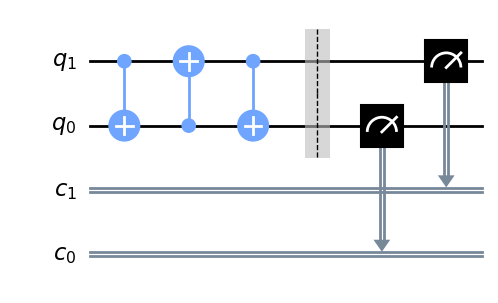

00 is mapped to {'00': 100}


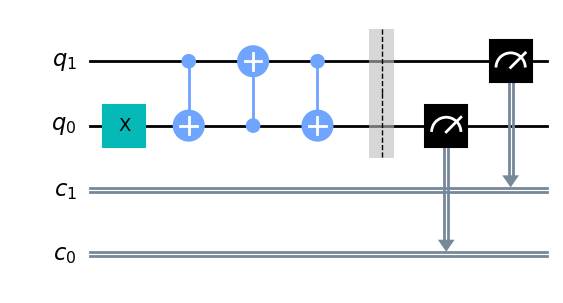

01 is mapped to {'10': 100}


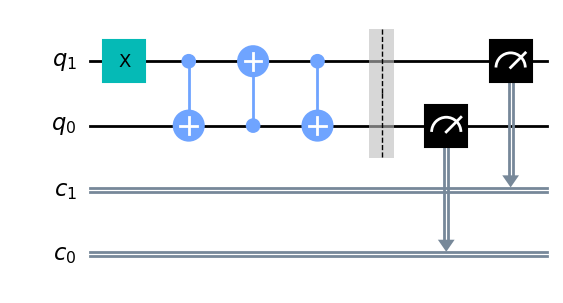

10 is mapped to {'01': 100}


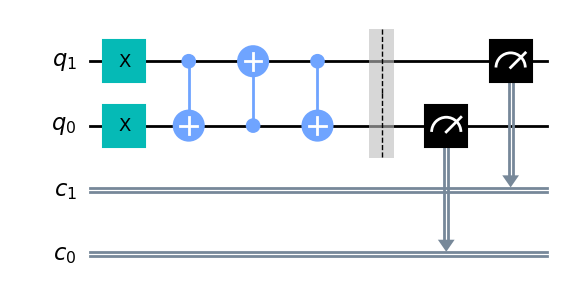

11 is mapped to {'11': 100}


In [43]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    #initialize the inputs w.r.t the reading order of Qiskit
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])
    # apply cx(down-qubit,up-qubit)
    qc.cx(q[0],q[1])
    # apply cx(up-qubit,down-qubit)
    qc.cx(q[1],q[0])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)

    # draw the circuit w.r.t the reading order of Qiskit
    display(qc.draw(output='mpl',reverse_bits=True))

    # execute the circuit 100 times in the local simulator
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask7()  # show solution for task 7